### Подключение к базе и основные таблицы

In [1]:
import pandas as pd

### Данные по пользователям

user_info = pd.read_sql(
    """SELECT * FROM public.user_data""",
    
    con="postgresql://robot-startml-ro:pheiph0hahj1Vaif@"
        "postgres.lab.karpov.courses:6432/startml"
)

user_info.head()

,user_id,gender,age,country,city,exp_group,os,source
0,200,1,34,Russia,Degtyarsk,3,Android,ads
1,201,0,37,Russia,Abakan,0,Android,ads
2,202,1,17,Russia,Smolensk,4,Android,ads
3,203,0,18,Russia,Moscow,1,iOS,ads
4,204,0,36,Russia,Anzhero-Sudzhensk,3,Android,ads


In [4]:
### Посты и топики

posts_info = pd.read_sql(
    """SELECT * FROM public.post_text_df""",
    
    con="postgresql://robot-startml-ro:pheiph0hahj1Vaif@"
        "postgres.lab.karpov.courses:6432/startml"
)

posts_info.head()

,post_id,text,topic
0,1,UK economy facing major risks\n\nThe UK manufa...,business
1,2,Aids and climate top Davos agenda\n\nClimate c...,business
2,3,Asian quake hits European shares\n\nShares in ...,business
3,4,India power shares jump on debut\n\nShares in ...,business
4,5,Lacroix label bought by US firm\n\nLuxury good...,business


In [5]:
### Почти 77 миллионов записей!
### Не в каждую оперативу влезет столько данных
### Для обучения моделей

count_feed_data = pd.read_sql(
    """SELECT count(*) FROM public.feed_data""",
    
    con="postgresql://robot-startml-ro:pheiph0hahj1Vaif@"
        "postgres.lab.karpov.courses:6432/startml"
)

count_feed_data.head()

,count
0,76892800


In [6]:
### Попробуем забрать 10 миллионов
import pandas as pd
feed_data = pd.read_sql(
    """SELECT * FROM public.feed_data LIMIT 5000000""",
    
    con="postgresql://robot-startml-ro:pheiph0hahj1Vaif@"
        "postgres.lab.karpov.courses:6432/startml"
)

feed_data.head()

,timestamp,user_id,post_id,action,target
0,2021-11-25 07:43:15,3813,6846,view,1
1,2021-11-25 07:43:56,3813,6846,like,0
2,2021-11-25 07:43:58,3813,5230,view,0
3,2021-11-25 07:45:48,3813,6208,view,0
4,2021-11-25 07:47:53,3813,671,view,1


### Работа с данными и фичи для контентной модели

In [7]:
### Как устроена колонка target?

feed_data[feed_data.action!='view']

,timestamp,user_id,post_id,action,target
1,2021-11-25 07:43:56,3813,6846,like,0
5,2021-11-25 07:49:29,3813,671,like,0
19,2021-11-25 08:10:13,3813,6121,like,0
23,2021-11-28 15:02:49,3813,5473,like,0
25,2021-11-28 15:04:36,3813,4217,like,0
...,...,...,...,...,...
4999979,2021-10-22 11:31:25,46958,1476,like,0
4999981,2021-10-22 11:32:07,46958,5421,like,0
4999984,2021-10-22 11:36:38,46958,1632,like,0
4999991,2021-10-22 11:44:29,46958,6359,like,0


In [8]:
### Почистим данные

feed_data = feed_data[feed_data.action=='view']

feed_data.head()

,timestamp,user_id,post_id,action,target
0,2021-11-25 07:43:15,3813,6846,view,1
2,2021-11-25 07:43:58,3813,5230,view,0
3,2021-11-25 07:45:48,3813,6208,view,0
4,2021-11-25 07:47:53,3813,671,view,1
6,2021-11-25 07:49:31,3813,4143,view,0


Напомним, как устроен контентный подход! 

Научимся по выбранной дате timestamp 

И для любой пары (user_id, post_id)

Предсказывать, случится лайк или нет

Хорошо бы иметь модель, которая умеет предсказывать вероятности

In [9]:
### Необходимо по user_id выделять 
### Фиксированный набор признаков
### В целом, подойдет оригинальный датасет

user_info

,user_id,gender,age,country,city,exp_group,os,source
0,200,1,34,Russia,Degtyarsk,3,Android,ads
1,201,0,37,Russia,Abakan,0,Android,ads
2,202,1,17,Russia,Smolensk,4,Android,ads
3,203,0,18,Russia,Moscow,1,iOS,ads
4,204,0,36,Russia,Anzhero-Sudzhensk,3,Android,ads
...,...,...,...,...,...,...,...,...
163200,168548,0,36,Russia,Kaliningrad,4,Android,organic
163201,168549,0,18,Russia,Tula,2,Android,organic
163202,168550,1,41,Russia,Yekaterinburg,4,Android,organic
163203,168551,0,38,Russia,Moscow,3,iOS,organic


In [10]:
### C post_id Придумаем какой-нибудь эмбеддинг 
### Для текстов

posts_info

,post_id,text,topic
0,1,UK economy facing major risks\n\nThe UK manufa...,business
1,2,Aids and climate top Davos agenda\n\nClimate c...,business
2,3,Asian quake hits European shares\n\nShares in ...,business
3,4,India power shares jump on debut\n\nShares in ...,business
4,5,Lacroix label bought by US firm\n\nLuxury good...,business
...,...,...,...
7018,7315,"OK, I would not normally watch a Farrelly brot...",movie
7019,7316,I give this movie 2 stars purely because of it...,movie
7020,7317,I cant believe this film was allowed to be mad...,movie
7021,7318,The version I saw of this film was the Blockbu...,movie


In [11]:
import re
import string

from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer

wnl = WordNetLemmatizer()

def preprocessing(line, token=wnl):
    line = line.lower()
    line = re.sub(r"[{}]".format(string.punctuation), " ", line)
    line = line.replace('\n\n', ' ').replace('\n', ' ')
    line = ' '.join([token.lemmatize(x) for x in line.split(' ')])
    return line


tfidf = TfidfVectorizer(
    stop_words='english',
    preprocessor=preprocessing
)

In [12]:
tfidf_data = (
    tfidf
    .fit_transform(posts_info['text'])
    .toarray()
)

tfidf_data

C:\Users\79289\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.
  warnings.warn(


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.13273932, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.05061394, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [13]:
tfidf_data = pd.DataFrame(
    tfidf_data,
    index=posts_info.post_id,
    columns=tfidf.get_feature_names_out()
)

tfidf_data

,00,000,0001,000bn,000m,000s,000th,001,001and,001st,...,𝓫𝓮,𝓫𝓮𝓽𝓽𝓮𝓻,𝓬𝓸𝓾𝓻𝓽𝓼,𝓱𝓮𝓪𝓻𝓲𝓷𝓰,𝓶𝓪𝔂,𝓹𝓱𝔂𝓼𝓲𝓬𝓪𝓵,𝓼𝓸𝓸𝓷𝓮𝓻,𝓼𝓾𝓫𝓸𝓻𝓭𝓲𝓷𝓪𝓽𝓮,𝓽𝓱𝓮,𝓽𝓸
post_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.132739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.050614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7315,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7316,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7317,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
### Генерим фичи на основе TfIdf

posts_info['TotalTfIdf'] = tfidf_data.sum(axis=1).reset_index()[0]
posts_info['MaxTfIdf'] = tfidf_data.max(axis=1).reset_index()[0]
posts_info['MeanTfIdf'] = tfidf_data.mean(axis=1).reset_index()[0]

posts_info.head()

,post_id,text,topic,TotalTfIdf,MaxTfIdf,MeanTfIdf
0,1,UK economy facing major risks\n\nThe UK manufa...,business,8.748129,0.495805,0.000190
1,2,Aids and climate top Davos agenda\n\nClimate c...,business,11.878472,0.308003,0.000258
2,3,Asian quake hits European shares\n\nShares in ...,business,12.675530,0.261799,0.000276
3,4,India power shares jump on debut\n\nShares in ...,business,6.622786,0.537713,0.000144
4,5,Lacroix label bought by US firm\n\nLuxury good...,business,6.352096,0.420251,0.000138


In [15]:
[f"DistanceTo{ith}thCluster" for ith in range(1, 16)]

['DistanceTo1thCluster',
 'DistanceTo2thCluster',
 'DistanceTo3thCluster',
 'DistanceTo4thCluster',
 'DistanceTo5thCluster',
 'DistanceTo6thCluster',
 'DistanceTo7thCluster',
 'DistanceTo8thCluster',
 'DistanceTo9thCluster',
 'DistanceTo10thCluster',
 'DistanceTo11thCluster',
 'DistanceTo12thCluster',
 'DistanceTo13thCluster',
 'DistanceTo14thCluster',
 'DistanceTo15thCluster']

In [16]:
### Пытаемся кластеризовать тексты

from sklearn.decomposition import PCA

centered = tfidf_data - tfidf_data.mean()

pca = PCA(n_components=20)
pca_decomp = pca.fit_transform(centered)

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=15, random_state=0).fit(pca_decomp)

posts_info['TextCluster'] = kmeans.labels_

dists_columns = ['DistanceTo1thCluster',
                 'DistanceTo2thCluster',
                 'DistanceTo3thCluster',
                 'DistanceTo4thCluster',
                 'DistanceTo5thCluster',
                 'DistanceTo6thCluster',
                 'DistanceTo7thCluster',
                 'DistanceTo8thCluster',
                 'DistanceTo9thCluster',
                 'DistanceTo10thCluster',
                 'DistanceTo11thCluster',
                 'DistanceTo12thCluster',
                 'DistanceTo13thCluster',
                 'DistanceTo14thCluster',
                 'DistanceTo15thCluster']

dists_df = pd.DataFrame(
    data=kmeans.transform(pca_decomp),
    columns=dists_columns
)

dists_df.head()

C:\Users\79289\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,DistanceTo1thCluster,DistanceTo2thCluster,DistanceTo3thCluster,DistanceTo4thCluster,DistanceTo5thCluster,DistanceTo6thCluster,DistanceTo7thCluster,DistanceTo8thCluster,DistanceTo9thCluster,DistanceTo10thCluster,DistanceTo11thCluster,DistanceTo12thCluster,DistanceTo13thCluster,DistanceTo14thCluster,DistanceTo15thCluster
0,0.462757,0.465458,0.529416,0.506783,0.222682,0.480645,0.438860,0.525280,0.438006,0.535863,0.438405,0.454251,0.502618,0.545897,0.395599
1,0.330105,0.339297,0.276100,0.383058,0.234409,0.347215,0.279889,0.413578,0.287934,0.428980,0.291857,0.312755,0.426742,0.445973,0.163731
2,0.353887,0.347820,0.477897,0.396749,0.091394,0.366366,0.317883,0.433717,0.311415,0.449954,0.314419,0.349172,0.431824,0.479584,0.249592
3,0.292002,0.306451,0.428601,0.359906,0.143613,0.325189,0.276959,0.386359,0.257381,0.416695,0.256612,0.291626,0.406987,0.441536,0.169586
4,0.231816,0.246859,0.391226,0.305121,0.224594,0.265998,0.212876,0.344345,0.170475,0.409263,0.165175,0.247230,0.352831,0.402474,0.101350


In [17]:
posts_info = pd.concat((posts_info,dists_df), axis=1)

posts_info.head()

,post_id,text,topic,TotalTfIdf,MaxTfIdf,MeanTfIdf,TextCluster,DistanceTo1thCluster,DistanceTo2thCluster,DistanceTo3thCluster,...,DistanceTo6thCluster,DistanceTo7thCluster,DistanceTo8thCluster,DistanceTo9thCluster,DistanceTo10thCluster,DistanceTo11thCluster,DistanceTo12thCluster,DistanceTo13thCluster,DistanceTo14thCluster,DistanceTo15thCluster
0,1,UK economy facing major risks\n\nThe UK manufa...,business,8.748129,0.495805,0.000190,4,0.462757,0.465458,0.529416,...,0.480645,0.438860,0.525280,0.438006,0.535863,0.438405,0.454251,0.502618,0.545897,0.395599
1,2,Aids and climate top Davos agenda\n\nClimate c...,business,11.878472,0.308003,0.000258,14,0.330105,0.339297,0.276100,...,0.347215,0.279889,0.413578,0.287934,0.428980,0.291857,0.312755,0.426742,0.445973,0.163731
2,3,Asian quake hits European shares\n\nShares in ...,business,12.675530,0.261799,0.000276,4,0.353887,0.347820,0.477897,...,0.366366,0.317883,0.433717,0.311415,0.449954,0.314419,0.349172,0.431824,0.479584,0.249592
3,4,India power shares jump on debut\n\nShares in ...,business,6.622786,0.537713,0.000144,4,0.292002,0.306451,0.428601,...,0.325189,0.276959,0.386359,0.257381,0.416695,0.256612,0.291626,0.406987,0.441536,0.169586
4,5,Lacroix label bought by US firm\n\nLuxury good...,business,6.352096,0.420251,0.000138,14,0.231816,0.246859,0.391226,...,0.265998,0.212876,0.344345,0.170475,0.409263,0.165175,0.247230,0.352831,0.402474,0.101350


In [18]:
### Воспроизведем датафрейм со всеми новыми фичами 

df = pd.merge(feed_data,
              posts_info,
              on='post_id',
              how='left')

df.head()

,timestamp,user_id,post_id,action,target,text,topic,TotalTfIdf,MaxTfIdf,MeanTfIdf,...,DistanceTo6thCluster,DistanceTo7thCluster,DistanceTo8thCluster,DistanceTo9thCluster,DistanceTo10thCluster,DistanceTo11thCluster,DistanceTo12thCluster,DistanceTo13thCluster,DistanceTo14thCluster,DistanceTo15thCluster
0,2021-11-25 07:43:15,3813,6846,view,1,I have never seen a Barbara Steele movie that ...,movie,9.229932,0.273051,0.000201,...,0.123694,0.268412,0.377902,0.105506,0.463949,0.219000,0.337242,0.379095,0.385174,0.229264
1,2021-11-25 07:43:58,3813,5230,view,0,If you want a horrible interpretation of MacBe...,movie,6.601720,0.336425,0.000144,...,0.162863,0.208625,0.336500,0.055939,0.433808,0.143248,0.298113,0.347822,0.372966,0.177753
2,2021-11-25 07:45:48,3813,6208,view,0,...am i missing something here??? unexpected p...,movie,10.833286,0.197583,0.000236,...,0.192990,0.240568,0.384112,0.123298,0.445228,0.228312,0.318309,0.385076,0.408521,0.211097
3,2021-11-25 07:47:53,3813,671,view,1,Court halts Mark Morrison album\n\nPremiership...,entertainment,7.934527,0.572530,0.000172,...,0.313575,0.237773,0.395173,0.241918,0.444512,0.263348,0.318243,0.382336,0.400218,0.158964
4,2021-11-25 07:49:31,3813,4143,view,0,"#coronavirusindia Odisha records 1,384 new cas...",covid,3.560062,0.371778,0.000077,...,0.324266,0.288941,0.315991,0.240781,0.463773,0.192369,0.346791,0.398278,0.445222,0.235096


In [19]:
df = pd.merge(df,
              user_info,
              on='user_id',
              how='left')

df.head()

,timestamp,user_id,post_id,action,target,text,topic,TotalTfIdf,MaxTfIdf,MeanTfIdf,...,DistanceTo13thCluster,DistanceTo14thCluster,DistanceTo15thCluster,gender,age,country,city,exp_group,os,source
0,2021-11-25 07:43:15,3813,6846,view,1,I have never seen a Barbara Steele movie that ...,movie,9.229932,0.273051,0.000201,...,0.379095,0.385174,0.229264,0,51,Ukraine,Sloviansk,0,iOS,ads
1,2021-11-25 07:43:58,3813,5230,view,0,If you want a horrible interpretation of MacBe...,movie,6.601720,0.336425,0.000144,...,0.347822,0.372966,0.177753,0,51,Ukraine,Sloviansk,0,iOS,ads
2,2021-11-25 07:45:48,3813,6208,view,0,...am i missing something here??? unexpected p...,movie,10.833286,0.197583,0.000236,...,0.385076,0.408521,0.211097,0,51,Ukraine,Sloviansk,0,iOS,ads
3,2021-11-25 07:47:53,3813,671,view,1,Court halts Mark Morrison album\n\nPremiership...,entertainment,7.934527,0.572530,0.000172,...,0.382336,0.400218,0.158964,0,51,Ukraine,Sloviansk,0,iOS,ads
4,2021-11-25 07:49:31,3813,4143,view,0,"#coronavirusindia Odisha records 1,384 new cas...",covid,3.560062,0.371778,0.000077,...,0.398278,0.445222,0.235096,0,51,Ukraine,Sloviansk,0,iOS,ads


In [20]:
df['hour'] = pd.to_datetime(df['timestamp']).apply(lambda x: x.hour)
df['month'] = pd.to_datetime(df['timestamp']).apply(lambda x: x.month)

df.head()

,timestamp,user_id,post_id,action,target,text,topic,TotalTfIdf,MaxTfIdf,MeanTfIdf,...,DistanceTo15thCluster,gender,age,country,city,exp_group,os,source,hour,month
0,2021-11-25 07:43:15,3813,6846,view,1,I have never seen a Barbara Steele movie that ...,movie,9.229932,0.273051,0.000201,...,0.229264,0,51,Ukraine,Sloviansk,0,iOS,ads,7,11
1,2021-11-25 07:43:58,3813,5230,view,0,If you want a horrible interpretation of MacBe...,movie,6.601720,0.336425,0.000144,...,0.177753,0,51,Ukraine,Sloviansk,0,iOS,ads,7,11
2,2021-11-25 07:45:48,3813,6208,view,0,...am i missing something here??? unexpected p...,movie,10.833286,0.197583,0.000236,...,0.211097,0,51,Ukraine,Sloviansk,0,iOS,ads,7,11
3,2021-11-25 07:47:53,3813,671,view,1,Court halts Mark Morrison album\n\nPremiership...,entertainment,7.934527,0.572530,0.000172,...,0.158964,0,51,Ukraine,Sloviansk,0,iOS,ads,7,11
4,2021-11-25 07:49:31,3813,4143,view,0,"#coronavirusindia Odisha records 1,384 new cas...",covid,3.560062,0.371778,0.000077,...,0.235096,0,51,Ukraine,Sloviansk,0,iOS,ads,7,11


In [21]:
### Уберем все ненужные колонки

df = df.drop([
#    'timestamp',  ### timestamp пока оставим
    'action',
    'text',
],
    axis=1)

df = df.set_index(['user_id', 'post_id'])

df.head(50)

timestamp  target          topic  TotalTfIdf  \
user_id post_id                                                          
3813    6846    2021-11-25 07:43:15       1          movie    9.229932   
        5230    2021-11-25 07:43:58       0          movie    6.601720   
        6208    2021-11-25 07:45:48       0          movie   10.833286   
        671     2021-11-25 07:47:53       1  entertainment    7.934527   
        4143    2021-11-25 07:49:31       0          covid    3.560062   
        1912    2021-11-25 07:52:02       0          sport    8.050329   
        2818    2021-11-25 07:54:40       0          covid    2.891516   
        1429    2021-11-25 07:55:59       0          sport   11.075314   
        5955    2021-11-25 07:57:13       0          movie    6.402176   
        4023    2021-11-25 07:58:32       0          covid    3.206064   
        3850    2021-11-25 07:59:50       0          covid    3.207320   
        3467    2021-11-25 08:01:25       0          covid    3.326211   
        1321    2021-11-25 08:03:30       0       politics   10.369698   
        443     2021-11-25 08:05:01       0       business    8.258992   
        7237    2021-11-25 08:06:05       0          movie    7.579575   
        5879    2021-11-25 08:07:50       0          movie    6.633335   
        6121    2021-11-25 08:08:22       1          movie    6.717172   
        5423    2021-11-25 08:10:15       0          movie    6.498292   
        2339    2021-11-25 08:12:22       0          covid    3.299769   
        5473    2021-11-28 15:01:19       1          movie   10.029486   
        4217    2021-11-28 15:02:51       1          movie    7.017403   
        4153    2021-11-28 15:04:38       0          covid    3.536549   
        2676    2021-11-28 15:06:04       0          covid    3.183345   
        4748    2021-11-28 15:08:49       0          movie   12.695995   
        4243    2021-11-28 15:10:41       0          movie    8.321403   
        2733    2021-11-28 15:13:04       0          covid    3.538897   
        6278    2021-11-28 15:14:12       0          movie    7.458887   
        6698    2021-11-28 15:15:08       1          movie    6.175081   
        6587    2021-11-28 15:16:39       1          movie    5.770800   
        196     2021-11-28 15:19:11       0       business    5.847212   
        4356    2021-11-28 15:21:06       0          movie   12.049513   
        7061    2021-11-28 15:23:40       0          movie   10.717934   
        6651    2021-11-28 15:26:25       0          movie    3.745367   
        1562    2021-11-28 15:28:18       0          sport    6.168753   
        2541    2021-11-28 15:30:37       0          covid    3.049464   
        1544    2021-11-28 15:31:14       0          sport    6.951952   
        3024    2021-11-28 15:32:25       0          covid    3.118199   
        2081    2021-11-28 15:35:11       0           tech    6.736265   
        5093    2021-11-28 15:35:41       0          movie    6.977583   
        1131    2021-11-28 15:38:33       0       politics    7.557260   
        3829    2021-11-28 15:39:32       0          covid    3.240642   
        2723    2021-11-28 15:41:43       0          covid    3.544127   
        5044    2021-11-28 15:42:49       0          movie    8.335913   
        3943    2021-11-28 15:43:49       0          covid    3.598783   
        2429    2021-11-28 15:45:23       0          covid    3.355782   
        5812    2021-11-28 15:48:05       0          movie   14.702677   
        5472    2021-11-28 15:49:37       0          movie    5.525661   
        3101    2021-11-28 15:52:12       0          covid    3.009292   
        983     2021-11-28 15:54:19       0       politics   10.988418   
        2445    2021-11-30 06:29:25       1          covid    3.157386   

                 MaxTfIdf  MeanTfIdf  TextCluster  DistanceTo1thCluster  \
user_id post_id                                                           
3813    6846     0.273051  

### Обучение моделей


In [22]:
max(df.timestamp), min(df.timestamp)

(Timestamp('2021-12-29 23:44:39'), Timestamp('2021-10-01 06:02:14'))

In [23]:
### За отсечку возьмем 2021-12-15

df_train = df[df.timestamp < '2021-12-15']
df_test = df[df.timestamp >= '2021-12-15']

df_train = df_train.drop('timestamp', axis=1)
df_test = df_test.drop('timestamp', axis=1)

X_train = df_train.drop('target', axis=1)
X_test = df_test.drop('target', axis=1)

y_train = df_train['target']
y_test = df_test['target']

y_train.shape, y_test.shape

((3716919,), (749515,))

In [24]:
X_train

topic  TotalTfIdf  MaxTfIdf  MeanTfIdf  TextCluster  \
user_id post_id                                                                
3813    6846             movie    9.229932  0.273051   0.000201            8   
        5230             movie    6.601720  0.336425   0.000144            8   
        6208             movie   10.833286  0.197583   0.000236            1   
        671      entertainment    7.934527  0.572530   0.000172           14   
        4143             covid    3.560062  0.371778   0.000077           10   
...                        ...         ...       ...        ...          ...   
46958   1747             sport   11.350430  0.273087   0.000247           12   
        2371             covid    2.986538  0.503532   0.000065           10   
        5739             movie    5.864750  0.360917   0.000127            1   
        4607             movie    5.408967  0.262147   0.000118            3   
        3822             covid    2.949723  0.652715   0.000064           10   

                 DistanceTo1thCluster  DistanceTo2thCluster  \
user_id post_id                                               
3813    6846                 0.274997              0.166286   
        5230                 0.222695              0.146897   
        6208                 0.283652              0.077391   
        671                  0.303083              0.269459   
        4143                 0.193133              0.304140   
...                               ...                   ...   
46958   1747                 0.292606              0.295562   
        2371                 0.143984              0.257492   
        5739                 0.377826              0.225407   
        4607                 0.325438              0.212736   
        3822                 0.134311              0.275898   

                 DistanceTo3thCluster  DistanceTo4thCluster  \
user_id post_id                                               
3813    6846                 0.441261              0.219352   
        5230                 0.413859              0.209180   
        6208                 0.400138              0.216394   
        671                  0.400495              0.347856   
        4143                 0.447358              0.356997   
...                               ...                   ...   
46958   1747                 0.438354              0.351008   
        2371                 0.421909              0.316238   
        5739                 0.491433              0.306436   
        4607                 0.485732              0.093075   
        3822                 0.443992              0.331024   

                 DistanceTo5thCluster  ...  DistanceTo15thCluster  gender  \
user_id post_id                        ...                                  
3813    6846                 0.333222  ...               0.229264       0   
        5230                 0.299099  ...               0.177753       0   
        6208                 0.335397  ...               0.211097       0   
        671                  0.299369  ...               0.158964       0   
        4143                 0.305878  ...               0.235096       0   
...                               ...  ...                    ...     ...   
46958   1747                 0.320209  ...               0.230104       1   
        2371                 0.315556  ...               0.201030       1   
        5739                 0.420116  ...               0.340092       1   
        4607                 0.384976  ...               0.302723       1   
        3822                 0.328662  ...               0.226059       1   

                 age  country         city  exp_group       os  source  hour  \
user_id post_id                                                                
3813    6846      51  Ukraine    Sloviansk          0      iOS     ads     7   
        5230      51  Ukraine    Sloviansk          0      iOS     ads     7   
        6208      51  

In [25]:
### Начнем с решающего дерева

from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder
from category_encoders.one_hot import OneHotEncoder

object_cols = [
    'topic', 'TextCluster', 'gender', 'country',
    'city', 'exp_group', 'hour', 'month',
    'os', 'source'
]

cols_for_ohe = [x for x in object_cols if X_train[x].nunique() < 5]
cols_for_mte = [x for x in object_cols if X_train[x].nunique() >= 5]

### Cохраним индексы этих колонок

cols_for_ohe_idx = [list(X_train.columns).index(col) for col in cols_for_ohe]
cols_for_mte_idx = [list(X_train.columns).index(col) for col in cols_for_mte]

t = [
    ('OneHotEncoder', OneHotEncoder(), cols_for_ohe_idx),
    ('MeanTargetEncoder', TargetEncoder(), cols_for_mte_idx)
]

col_transform = ColumnTransformer(transformers=t)

from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

pipe_dt = Pipeline([("column_transformer",
                     col_transform),
                     
                    ("decision_tree", 
                     DecisionTreeClassifier())])

pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(),
                                                  [20, 28, 25, 26]),
                                                 ('MeanTargetEncoder',
                                                  TargetEncoder(),
                                                  [0, 4, 22, 23, 24, 27])])),
                ('decision_tree', DecisionTreeClassifier())])

In [26]:
### Замерим качество работы такой модели
### Возьмем ROC-AUC

from sklearn.metrics import roc_auc_score

print(f"Качество на трейне: {roc_auc_score(y_train, pipe_dt.predict_proba(X_train)[:, 1])}")
print(f"Качество на тесте: {roc_auc_score(y_test, pipe_dt.predict_proba(X_test)[:, 1])}")

Качество на трейне: 0.9218922294447975
Качество на тесте: 0.5335723766880769


In [27]:
### Теперь обучим катбуст

from catboost import CatBoostClassifier

catboost = CatBoostClassifier(iterations=100,
                              learning_rate=1,
                              depth=2)

catboost.fit(X_train, y_train, object_cols)

0:	learn: 0.3559382	total: 1.08s	remaining: 1m 46s
1:	learn: 0.3490936	total: 1.84s	remaining: 1m 30s
2:	learn: 0.3479386	total: 2.67s	remaining: 1m 26s
3:	learn: 0.3472675	total: 3.48s	remaining: 1m 23s
4:	learn: 0.3471100	total: 4.29s	remaining: 1m 21s
5:	learn: 0.3470091	total: 5.12s	remaining: 1m 20s
6:	learn: 0.3468930	total: 5.8s	remaining: 1m 17s
7:	learn: 0.3459879	total: 6.45s	remaining: 1m 14s
8:	learn: 0.3459511	total: 7.04s	remaining: 1m 11s
9:	learn: 0.3459078	total: 7.66s	remaining: 1m 8s
10:	learn: 0.3459011	total: 8.28s	remaining: 1m 7s
11:	learn: 0.3458280	total: 8.92s	remaining: 1m 5s
12:	learn: 0.3457711	total: 9.56s	remaining: 1m 3s
13:	learn: 0.3457450	total: 10.2s	remaining: 1m 2s
14:	learn: 0.3457180	total: 10.9s	remaining: 1m 1s
15:	learn: 0.3457021	total: 11.6s	remaining: 1m 1s
16:	learn: 0.3455558	total: 12.3s	remaining: 60s
17:	learn: 0.3452847	total: 13s	remaining: 59.1s
18:	learn: 0.3452345	total: 13.6s	remaining: 58.2s
19:	learn: 0.3451908	total: 14.3s	rem

In [28]:
### Замерим качество работы такой модели
### Возьмем ROC-AUC

print(f"Качество на трейне: {roc_auc_score(y_train, catboost.predict_proba(X_train)[:, 1])}")
print(f"Качество на тесте: {roc_auc_score(y_test, catboost.predict_proba(X_test)[:, 1])}")

Качество на трейне: 0.6658574180521579
Качество на тесте: 0.6491596939160278


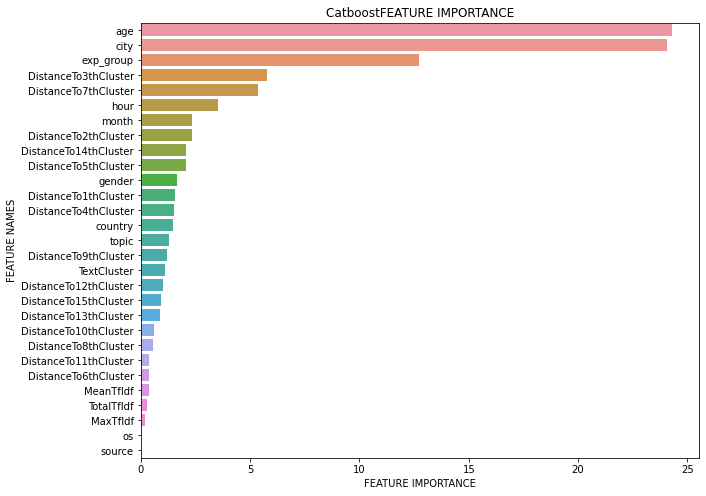

In [29]:
### посмотрим на feature_importance

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    
plot_feature_importance(catboost.feature_importances_,X_train.columns,'Catboost')

In [30]:
### Сохраним модель

catboost.save_model(
    'catboost_model2',
    format="cbm"                  
)

### Положим в базу фичи, необходимые для функционала нашей модели

In [35]:
posts_info.to_csv('1234431')                               
                                   

In [33]:
date=pd.read_csv('1234431')

In [34]:
date

,Unnamed: 0,post_id,text,topic,TotalTfIdf,MaxTfIdf,MeanTfIdf,TextCluster,DistanceTo1thCluster,DistanceTo2thCluster,...,DistanceTo6thCluster,DistanceTo7thCluster,DistanceTo8thCluster,DistanceTo9thCluster,DistanceTo10thCluster,DistanceTo11thCluster,DistanceTo12thCluster,DistanceTo13thCluster,DistanceTo14thCluster,DistanceTo15thCluster
0,0,1,UK economy facing major risks\n\nThe UK manufa...,business,8.748129,0.495805,0.000190,4,0.462757,0.465458,...,0.480645,0.438860,0.525280,0.438006,0.535863,0.438405,0.454251,0.502618,0.545897,0.395599
1,1,2,Aids and climate top Davos agenda\n\nClimate c...,business,11.878472,0.308003,0.000258,14,0.330105,0.339297,...,0.347215,0.279889,0.413578,0.287934,0.428980,0.291857,0.312755,0.426742,0.445973,0.163731
2,2,3,Asian quake hits European shares\n\nShares in ...,business,12.675530,0.261799,0.000276,4,0.353887,0.347820,...,0.366366,0.317883,0.433717,0.311415,0.449954,0.314419,0.349172,0.431824,0.479584,0.249592
3,3,4,India power shares jump on debut\n\nShares in ...,business,6.622786,0.537713,0.000144,4,0.292002,0.306451,...,0.325189,0.276959,0.386359,0.257381,0.416695,0.256612,0.291626,0.406987,0.441536,0.169586
4,4,5,Lacroix label bought by US firm\n\nLuxury good...,business,6.352096,0.420251,0.000138,14,0.231816,0.246859,...,0.265998,0.212876,0.344345,0.170475,0.409263,0.165175,0.247230,0.352831,0.402474,0.101350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,7018,7315,"OK, I would not normally watch a Farrelly brot...",movie,6.703302,0.258412,0.000146,3,0.373978,0.168976,...,0.321415,0.342832,0.446934,0.262573,0.506499,0.343997,0.409744,0.458117,0.493954,0.337270
7019,7019,7316,I give this movie 2 stars purely because of it...,movie,6.471377,0.399419,0.000141,3,0.322680,0.176928,...,0.246981,0.320128,0.412409,0.208128,0.463781,0.278688,0.357602,0.417734,0.433615,0.286991
7020,7020,7317,I cant believe this film was allowed to be mad...,movie,5.628524,0.573061,0.000122,5,0.279908,0.194796,...,0.064129,0.271139,0.377878,0.159088,0.458583,0.234291,0.340757,0.404183,0.400045,0.250067
7021,7021,7318,The version I saw of this film was the Blockbu...,movie,6.883375,0.231244,0.000150,1,0.324337,0.166537,...,0.175279,0.291362,0.411718,0.201085,0.473822,0.284445,0.354765,0.406323,0.365435,0.268542


In [29]:
### Все ли норм?

test_ = pd.read_sql(
    """SELECT * FROM public.posts_info_features""",
    
    con="postgresql://robot-startml-ro:pheiph0hahj1Vaif@"
        "postgres.lab.karpov.courses:6432/startml"
)

test_

,index,post_id,text,topic,TotalTfIdf,MaxTfIdf,MeanTfIdf,TextCluster,DistanceTo1thCluster,DistanceTo2thCluster,...,DistanceTo6thCluster,DistanceTo7thCluster,DistanceTo8thCluster,DistanceTo9thCluster,DistanceTo10thCluster,DistanceTo11thCluster,DistanceTo12thCluster,DistanceTo13thCluster,DistanceTo14thCluster,DistanceTo15thCluster
0,0,1,UK economy facing major risks\n\nThe UK manufa...,business,8.748129,0.495805,0.000190,7,0.464858,0.545120,...,0.433995,0.577318,0.134495,0.438854,0.478335,0.554439,0.503198,0.444850,0.529914,0.435126
1,1,2,Aids and climate top Davos agenda\n\nClimate c...,business,11.878472,0.308003,0.000258,14,0.329219,0.447268,...,0.272379,0.348743,0.267576,0.294497,0.342534,0.452958,0.421031,0.290713,0.413338,0.151564
2,2,3,Asian quake hits European shares\n\nShares in ...,business,12.675530,0.261799,0.000276,7,0.354650,0.478513,...,0.319155,0.539388,0.138053,0.313304,0.361917,0.469226,0.428712,0.327296,0.434025,0.330876
3,3,4,India power shares jump on debut\n\nShares in ...,business,6.622786,0.537713,0.000144,2,0.292561,0.442270,...,0.259113,0.496295,0.238639,0.255517,0.319788,0.436499,0.405631,0.285237,0.386056,0.261038
4,4,5,Lacroix label bought by US firm\n\nLuxury good...,business,6.352096,0.420251,0.000138,2,0.232188,0.400466,...,0.206380,0.461596,0.301988,0.160107,0.258825,0.434513,0.350052,0.221366,0.345960,0.219381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,7017,7314,Although the likeliness of someone focusing on...,movie,10.326422,0.300231,0.000224,4,0.499668,0.577736,...,0.489954,0.628303,0.546901,0.471681,0.413295,0.616205,0.554241,0.467880,0.563877,0.485634
7019,7018,7315,"OK, I would not normally watch a Farrelly brot...",movie,6.703302,0.258412,0.000146,4,0.373062,0.491151,...,0.381781,0.551963,0.446328,0.343050,0.310712,0.524987,0.450806,0.346600,0.449628,0.377193
7020,7020,7317,I cant believe this film was allowed to be mad...,movie,5.628524,0.573061,0.000122,9,0.279754,0.398625,...,0.305508,0.515819,0.388929,0.232468,0.062591,0.480749,0.401517,0.275045,0.380296,0.312369
7021,7021,7318,The version I saw of this film was the Blockbu...,movie,6.883375,0.231244,0.000150,9,0.325176,0.360769,...,0.324066,0.508580,0.394701,0.283542,0.169344,0.492864,0.404583,0.297992,0.413360,0.322861


In [30]:

import os
p = os.path.abspath('catboost_model1')
print(p)


C:\Users\79289\Desktop\МО\catboost_model1
